In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 1. Генерация случайных величин с заранее заданной ковариационной матрицей.



Разложение Холецкого используется для генерации коррелированных между собой случайных величин. Проще говоря, когда есть какой-то набор независимых случайных величин и ковариационная матрица. Как из этого получить набор случайных величин, имеющих такую ковариационную матрицу ?

Это нужно как для моделирования случайных сигналов и физических процессов, так и в качестве вспомогательного элемента других вычислительных методов (Монте-Карло).
Решение этой задачи делается с помощью разложения Холецкого. Алгоритм заключается в следующем:
1. Осуществить разложение Холецкого ковариационной матрицы: $\boldsymbol{\Sigma}=\mathbf{A} \mathbf{A}^T$
2. Сгенерировать случайный вектор $\mathbf{z}$, компонентами которого являются независимые случайные величины с нормальным распределением

3. Решением поставленной задачи будет вектор:
$$
\mathbf{x}=\mathbf{m}+\mathbf{A} \mathbf{z}
$$
Здесь $\mathbf{m}$ - это постоянный вектор, составленный из математических ожиданий компонент вектора $\mathbf{z}$.

Напишите функцию, которая в качестве входного параметра берёт ковариационную матрицу, а возвращает набор случайных величин, действуя по описанному выше алгоритму.

Сравните скорость работы вашей функции со встроенной библиотечной реализацией, как тут [Работа со случайными величинами.](https://miptstats.github.io/courses/python/07_random.html)



In [2]:
def generate_correlated_random(cov_matrix, mean_vector=None):
    n = cov_matrix.shape[0]
    if mean_vector is None:
        mean_vector = np.zeros(n)
    elif len(mean_vector) != n:
        raise ValueError("размер вектора")
    try:
        A = np.linalg.cholesky(cov_matrix)
    except np.linalg.LinAlgError:
        raise ValueError("LinAlgError")

    z = np.random.normal(0, 1, size=(1, n))
    x = mean_vector + A @ z[0]
    return x


cov_matrix = np.array([[4.0, 2.0, 1.0],
                      [2.0, 9.0, 3.0],
                      [1.0, 3.0, 16.0]])
mean_vector = np.array([1.0, 2.0, 3.0])

print(generate_correlated_random(cov_matrix, mean_vector=mean_vector))

[-0.70616054  5.8404824   1.49869441]




### 2. Обработка экспериментальных данных..

1. Обработайте какую-нибудь лабораторную работу (например, из курса общей физики или просто из папки на диске), требующую проведения прямой по экспериментально полученным точкам. Для решения задачи регрессии рекомендуется использовать библиотеку scikit-learn (sklearn) или scipy.

2. Создайте прямую с шумом и аналогично обработайте данные.

В обоих пунктах нужно построить график, на который будут нанесены точки и прямая среднеквадратической регрессии.

Данные можно сформировать следующим образом:



In [3]:
# данные из лабораторной работы
data = pd.read_excel("data.xlsx")

T = data["T"][:-1]
U = data["U"][:-1]
I = data["I"][:-1]

In [4]:
def plot_regression(x, y, y_pred, title, xlabel='X', ylabel='Y'):
    plt.figure()

    plt.scatter(x, y, alpha=0.7)
    plt.plot(x, y_pred, linewidth=2)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Зависимость U от T


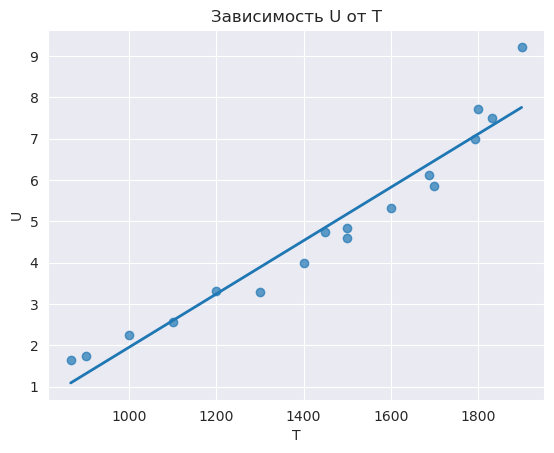

Уравнение: U = 0.0064·T + -4.4979
Среднеквадратичная ошибка: 0.2905

Зависимость I от T


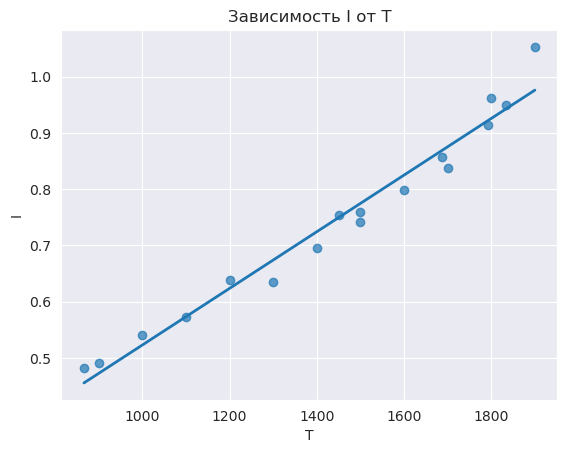

Уравнение: I = 0.0005·T + 0.0192
Среднеквадратичная ошибка: 0.0009

Зависимость U от I


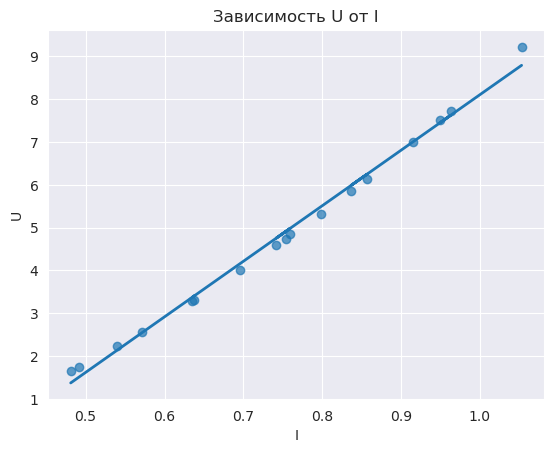

Уравнение: U = 12.9682·I + -4.8651
Среднеквадратичная ошибка: 0.0305


In [5]:
#1
real_data = pd.DataFrame({
    'T': T,
    'U': U,
    'I': I
})

print("Зависимость U от T")
X_UT = T.values.reshape(-1, 1)
y_UT = U.values

model_UT = LinearRegression()
model_UT.fit(X_UT, y_UT)
y_pred_UT = model_UT.predict(X_UT)

w1_UT = model_UT.coef_[0]
w0_UT = model_UT.intercept_

plot_regression(
    T.values, U.values, y_pred_UT,
    'Зависимость U от T',
    'T', 'U'
)

print(f"Уравнение: U = {w1_UT:.4f}·T + {w0_UT:.4f}")
print(f"Среднеквадратичная ошибка: {mean_squared_error(y_UT, y_pred_UT):.4f}")

print()
print("Зависимость I от T")

X_IT = T.values.reshape(-1, 1)
y_IT = I.values

model_IT = LinearRegression()
model_IT.fit(X_IT, y_IT)
y_pred_IT = model_IT.predict(X_IT)

w1_IT = model_IT.coef_[0]
w0_IT = model_IT.intercept_

plot_regression(
    T.values, I.values, y_pred_IT,
    'Зависимость I от T',
    'T', 'I'
)

print(f"Уравнение: I = {w1_IT:.4f}·T + {w0_IT:.4f}")
print(f"Среднеквадратичная ошибка: {mean_squared_error(y_IT, y_pred_IT):.4f}")


print()
print("Зависимость U от I")

X_UI = I.values.reshape(-1, 1)
y_UI = U.values

model_UI = LinearRegression()
model_UI.fit(X_UI, y_UI)
y_pred_UI = model_UI.predict(X_UI)

w1_UI = model_UI.coef_[0]
w0_UI = model_UI.intercept_


plot_regression(
    I.values, U.values, y_pred_UI,
    'Зависимость U от I',
    'I', 'U'
)

print(f"Уравнение: U = {w1_UI:.4f}·I + {w0_UI:.4f}")
print(f"Среднеквадратичная ошибка: {mean_squared_error(y_UI, y_pred_UI):.4f}")


ОБРАБОТКА ПРЯМОЙ С ШУМОМ


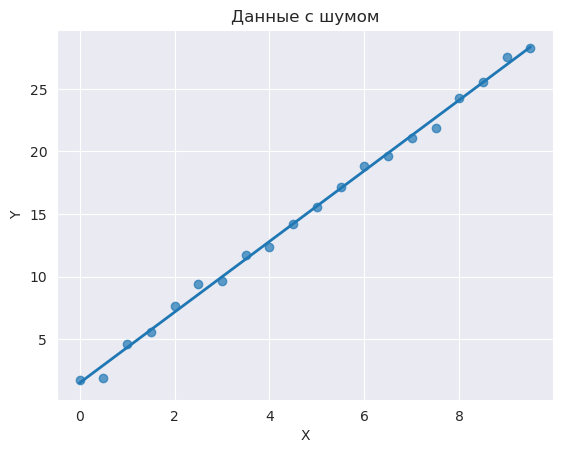

Оцененное уравнение: y = 2.8237x + 1.5197
Среднеквадратичная ошибка: 0.2054

Сравнение с истинными параметрами:
Угловой коэффициент: истинный = 2.8, оцененный = 2.8237
Свободный член: истинный = 1.5, оцененный = 1.5197


In [6]:
#2
print("ОБРАБОТКА ПРЯМОЙ С ШУМОМ")

true_w1 = 2.8
true_w0 = 1.5
xs = np.arange(0, 10, 0.5)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise


X_synth = xs.reshape(-1, 1)
y_synth = ys

model_synth = LinearRegression()
model_synth.fit(X_synth, y_synth)
y_pred_synth = model_synth.predict(X_synth)

w1_synth = model_synth.coef_[0]
w0_synth = model_synth.intercept_

plot_regression(
    xs, ys, y_pred_synth,
    'Данные с шумом',
    'X', 'Y'
)

print(f"Оцененное уравнение: y = {w1_synth:.4f}x + {w0_synth:.4f}")
print(f"Среднеквадратичная ошибка: {mean_squared_error(y_synth, y_pred_synth):.4f}")
print()
print(f"Сравнение с истинными параметрами:")
print(f"Угловой коэффициент: истинный = {true_w1}, оцененный = {w1_synth:.4f}")
print(f"Свободный член: истинный = {true_w0}, оцененный = {w0_synth:.4f}")

### 3. Правдоподобие для гауссовой вероятностной модели.

Пусть дана выборка точек на прямой $\left\{x_i\right\}$.

Максимизируйте правдоподобие (или его логарифм) в гауссовой вероятностной модели:
$$
\prod_i p\left(x_i\right) \rightarrow \max _{\mu, \sigma} \quad p(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} .
$$


Функция правдоподобия:
$$
L(\mu, \sigma) = \prod_{i=1}^N p(x_i) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
$$

Логарифм правдоподобия:
$$
\ln L(\mu, \sigma) = \sum_{i=1}^N \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}\right)
$$

$$
= -\frac{N}{2}\ln(2\pi) - \frac{N}{2}\ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^N (x_i - \mu)^2
$$

Максимизация по $\mu$:
$$
\frac{\partial \ln L}{\partial \mu} = \frac{1}{\sigma^2}\sum_{i=1}^N (x_i - \mu) = 0
$$

$$
\sum_{i=1}^N (x_i - \mu) = 0 \Rightarrow \mu = \frac{1}{N}\sum_{i=1}^N x_i
$$

Максимизация по $\sigma^2$:
$$
\frac{\partial \ln L}{\partial \sigma^2} = -\frac{N}{2\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^N (x_i - \mu)^2 = 0
$$

$$
-\frac{N}{2\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^N (x_i - \mu)^2 = 0 \Rightarrow \sigma^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2
$$




### 4. Гауссовы интегралы для МНК.


На лекции обсуждался учет влияния систематической погрешности путем усреднения решения задачи МНК по гауссовому нормальному распределению для $y$-координат точек выборки: $\tilde{y}_i \sim \mathcal{N}\left(y_i, s^2\right)$, где погрешность по оси ординат считалась равной $s$. Обобщите этот вывод на случай, когда каждая точка имеет свою $y$-погрешность $s_i$. Для этого проведите усреднение по многомерному нормальному распределению для $\tilde{y}_i$ с произвольной симметричной матрицей ковариации $A^{-1}$ :
$$
\begin{array}{r}
\tilde{y} \sim \frac{1}{(2 \pi)^{N / 2} (\operatorname{det} (A))^{1/2} } \exp \left(-\frac{(\tilde{y}-y)^T A^{-1}(\tilde{y}-y)}{2}\right), \ \ \ \ (1) \\
\text { где } y=\left(\begin{array}{lll}
y_i & \ldots & y_N
\end{array}\right)^T, \text { a } \tilde{y}=\left(\begin{array}{lll}
\tilde{y}_i & \ldots & \tilde{y}_N
\end{array}\right)^T .
\end{array}
$$
1. Покажите, что распределение (1) правильно нормировано. Указание: Выполните замену координат $\tilde{y}-y=S z$, где матрица $S$ диагонализует $A$.
2. Вычислите неприводимые парные корреляторы $\left\langle\left\langle\tilde{w}_i \tilde{w}_j\right\rangle\right\rangle$, усредняя по распределению (1). Указание: Сделайте замену $\tilde{y}-y=Y$. Для вычисления гауссового интеграла с предэкспонентой вычислите интеграл $\int d^N Y \exp \left(-Y^T A^{-1} Y / 2+J^T Y\right)$ и выполните дифференцирование по параметрам $J_i$ (компоненты вектора $J$ ).


1.


Чтобы показать нормировку, проинтегрируем $ P(\tilde{y}) $. Сделаем замену переменных:

$$
\tilde{y} - y = S z,
$$

где $ S $ — матрица, такая что $A = S S^T$.

Якобиан замены: $ d\tilde{y} = |\det S| \, dz = (\det A)^{1/2} \, dz $, так как $ \det A = (\det S)^2 $. Квадратичная форма:
$$
(\tilde{y} - y)^T A^{-1} (\tilde{y} - y) = (S z)^T (S S^T)^{-1} (S z) = z^T S^T (S^T)^{-1} S^{-1} S z = z^T z.
$$

Подставляем в интеграл:

$$
\int P(\tilde{y}) \, d\tilde{y} = \frac{1}{(2\pi)^{N/2} (\det A)^{1/2}} \int \exp\left(-\frac{1}{2} z^T z\right) (\det A)^{1/2} \, dz = \frac{1}{(2\pi)^{N/2}} \int \exp\left(-\frac{1}{2} \sum_{i=1}^N z_i^2\right) dz.
$$
Но
$$
\int_{-\infty}^{\infty} \exp\left(-\frac{1}{2} z_i^2\right) dz_i = \sqrt{2\pi},
$$

следовательно:

$$
\int P(\tilde{y}) \, d\tilde{y} = \frac{1}{(2\pi)^{N/2}} \left(\sqrt{2\pi}\right)^N = 1.
$$


2.

Веса МНК выражаются как:

$$
\tilde{w} = (X^T X)^{-1} X^T \tilde{y} = Q \tilde{y}, \quad \text{где } Q = (X^T X)^{-1} X^T.
$$

Компоненты вектора весов:

$$
\tilde{w}_\alpha = Q_{\alpha k} \tilde{y}_k \quad (\text{суммирование по } k).
$$

Найдём ковариацию весов:

$$
\left\langle\left\langle \tilde{w}_\alpha \tilde{w}_\beta \right\rangle\right\rangle = \left\langle \tilde{w}_\alpha \tilde{w}_\beta \right\rangle - \left\langle \tilde{w}_\alpha \right\rangle \left\langle \tilde{w}_\beta \right\rangle.
$$

Сначала вычислим средние значения. Поскольку $ \langle \tilde{y}_k \rangle = y_k $, то:

$$
\langle \tilde{w}_\alpha \rangle = Q_{\alpha k} y_k = w_\alpha,
$$

где $ w $ — истинные веса. Аналогично:

$$
\langle \tilde{w}_\alpha \tilde{w}_\beta \rangle = Q_{\alpha i} Q_{\beta j} \langle \tilde{y}_i \tilde{y}_j \rangle.
$$

Введём $ Y = \tilde{y} - y $, тогда $ \langle Y \rangle = 0 $, и:

$$
\langle \tilde{y}_i \tilde{y}_j \rangle = y_i y_j + \langle Y_i Y_j \rangle.
$$

Таким образом:

$$
\langle \tilde{w}_\alpha \tilde{w}_\beta \rangle = Q_{\alpha i} Q_{\beta j} (y_i y_j + \langle Y_i Y_j \rangle) = w_\alpha w_\beta + Q_{\alpha i} Q_{\beta j} \langle Y_i Y_j \rangle.
$$

Ковариация весов:

$$
\left\langle\left\langle \tilde{w}_\alpha \tilde{w}_\beta \right\rangle\right\rangle = Q_{\alpha i} Q_{\beta j} \langle Y_i Y_j \rangle.
$$

Осталось вычислить $ \langle Y_i Y_j \rangle $. Для этого используем метод производящей функции. Рассмотрим интеграл:

$$
Z(J) = \int d^N Y \exp\left(-\frac{1}{2} Y^T A^{-1} Y + J^T Y\right).
$$

Сделаем замену $ Y = S z $, где $ A = S S^T $. Тогда:

- $ Y^T A^{-1} Y = z^T z $,
- $ dY = (\det A)^{1/2} dz $,
- $ J^T Y = J^T S z = (S^T J)^T z $.

Интеграл принимает вид:

$$
Z(J) = (\det A)^{1/2} \int d^N z \exp\left(-\frac{1}{2} z^T z + (S^T J)^T z\right).
$$

Это гауссов интеграл, который вычисляется как:

$$
Z(J) = (\det A)^{1/2} (2\pi)^{N/2} \exp\left(\frac{1}{2} (S^T J)^T (S^T J)\right) = (2\pi)^{N/2} (\det A)^{1/2} \exp\left(\frac{1}{2} J^T A J\right).
$$

Теперь вычислим $ \langle Y_i Y_j \rangle $:

$$
\langle Y_i Y_j \rangle = \frac{1}{Z(0)} \frac{\partial^2 Z(J)}{\partial J_i \partial J_j} \bigg|_{J=0}.
$$

При $ J = 0 $, $ Z(0) = (2\pi)^{N/2} (\det A)^{1/2} $. Найдём производные:

$$
\frac{\partial Z(J)}{\partial J_i} = Z(J) \cdot (A J)_i, \quad \frac{\partial^2 Z(J)}{\partial J_i \partial J_j} = Z(J) \left( A_{ij} + (A J)_i (A J)_j \right).
$$

При $ J = 0 $:

$$
\frac{\partial^2 Z(J)}{\partial J_i \partial J_j} \bigg|_{J=0} = Z(0) A_{ij},
$$

следовательно:

$$
\langle Y_i Y_j \rangle = A_{ij}.
$$

Окончательно, ковариация весов:

$$
\left\langle\left\langle \tilde{w}_\alpha \tilde{w}_\beta \right\rangle\right\rangle = Q_{\alpha i} Q_{\beta j} A_{ij} = (Q A Q^T)_{\alpha\beta}.
$$




### 5. Систематические погрешности в МНК.

Выполните в условиях предыдущей задачи.

1. Оцените систематические погрешности параметров модели $w_\alpha$, следуя вычислению, приведенному на лекции, и используя корреляторы, полученные в предыдущем пункте.
2. Запишите решение в частном случае диагональной матрицы $A=\operatorname{diag}\left(A_1, \ldots, A_N\right)$. Как следует выбирать величины $A_i$ для моделирования $y$-погрешности $i$-ой точки, равной $s_i$ ?

1.
Ковариация весов модели вычисляется как:
$$
\left\langle\left\langle \tilde{w}_\alpha \tilde{w}_\beta \right\rangle\right\rangle = (Q A Q^T)_{\alpha\beta}.
$$
Следовательно, систематическая погрешность для параметра $ w_\alpha $ равна стандартному отклонению:
$$
\Delta_{\text{сист}} w_\alpha = \sqrt{\left\langle\left\langle \tilde{w}_\alpha \tilde{w}_\alpha \right\rangle\right\rangle} = \sqrt{(Q A Q^T)_{\alpha\alpha}}.
$$
2.
Элементы матрицы равны $ A_{ij} = A_i \delta_{ij} $, и ковариация весов:
$$
(Q A Q^T)_{\alpha\beta} = \sum_{i,j} Q_{\alpha i} A_{ij} Q_{\beta j} = \sum_i Q_{\alpha i} A_i Q_{\beta i}.
$$
Для диагональных элементов:
$$
(Q A Q^T)_{\alpha\alpha} = \sum_i Q_{\alpha i}^2 A_i.
$$
Таким образом, систематическая погрешность для параметра $ w_\alpha $ равна:
$$
\Delta_{\text{сист}} w_\alpha = \sqrt{\sum_i Q_{\alpha i}^2 A_i}.
$$

Дисперсия $ \tilde{y}_i $ равна $ s_i^2 $. В многомерном распределении матрица $ A $ является ковариационной матрицей для $ \tilde{y} $, поэтому:
$$
A_i = s_i^2.
$$
Подставляя это в формулу для погрешности, получаем:
$$
\Delta_{\text{сист}} w_\alpha = \sqrt{\sum_i Q_{\alpha i}^2 s_i^2}.
$$



### 6*. Систематические погрешности весов в МНК при учёте погрешностей х-координат.

Выполните оценку погрешности весов $w_\alpha$, учитывая систематическую погрешность $x$-координат точек выборки, усреднив решение задачи МНK по гауссовому нормальному распределению $\tilde{x}_i \sim \mathcal{N}\left(x_i, s_i^2\right)$. Для простоты считайте погрешности для каждой точки равными: $s_i=s$ и пренебрегайте погрешностью $y$-координат.

Указание: разложите аналитическое решение задачи МНK в ряд Тейлора по отклонениям $\tilde{x}_i-x_i$, считая такое разложение допустимым.


